## Import Libraries

In [2]:
# Importing the libraries, fill the import name libraries below
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

#Import keras libraries that you need
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
import math
from sklearn.metrics import mean_squared_error

# EDA

In [3]:
# Some functions to help out with this code
def prediction_plot(test, predicted):
    plt.plot(test, color='red', label='Actual Stock Price')
    plt.plot(predicted, color='blue', label='Predicted Stock Price')
    #fill the function to predict
    plt.title('Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

def rmse_eval(test, predicted):
    #fill the function for evaluation model
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print('RMSE:', rmse)

In [4]:
# Import Dataset
dataset = pd.read_csv('AABA_2006-01-01_to_2018-01-01.csv') #import dataset based on your directory
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset = dataset.set_index('Date')

In [5]:
# Checking for missing values, choose for data training and set in kind of year
#a : until year training 
#b : year for testing
training_set = dataset[:'2016'].iloc[:, 1:2].values
test_set = dataset['2017':].iloc[:, 1:2].values

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 229.6+ KB
None
Statistik deskriptif dataset:
              Open         High          Low        Close        Volume
count  3019.000000  3019.000000  3019.000000  3019.000000  3.019000e+03
mean     28.426479    28.766532    28.066558    28.412726  2.158391e+07
std      13.257242    13.356692    13.157326    13.258163  1.926231e+07
min       9.100000     9.480000     8.940000     8.950000  1.939061e+06
25%      16.175000    16.385000    15.970000    16.130000  1.248025e+07
50%      27.180000    27.49000

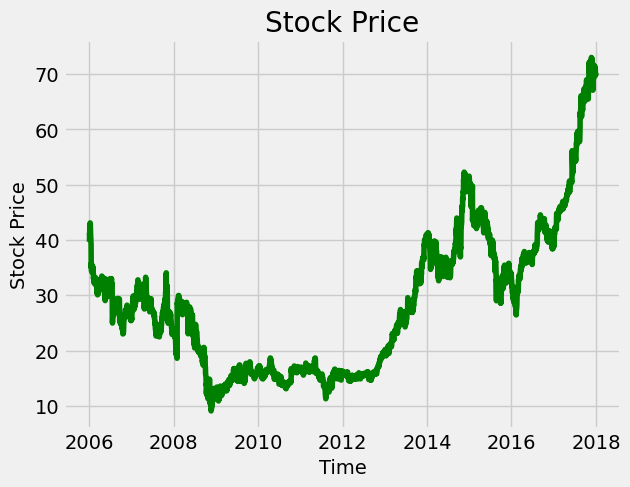

In [6]:
#info dataset
print("Informasi dataset:")
print(dataset.info())

# Pemeriksaan data
print("Statistik deskriptif dataset:")
print(dataset.describe())

print("Beberapa baris pertama dataset:")
print(dataset.head())
# Visualisasi data
plt.plot(dataset['Open'], color='green')
plt.title('Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

### Write your insight in EDA here
Insight 1: Harga saham menunjukkan tren naik secara keseluruhan dari tahun 2006 hingga 2018, menunjukkan potensi pertumbuhan jangka panjang dalam nilai perusahaan.

Insight 2: Terdapat fluktuasi yang mencolok dalam harga saham, menunjukkan volatilitas dalam pasar dan peluang potensial untuk perdagangan jangka pendek

Insight 3: Terlihat periode pertumbuhan yang signifikan naik sekitar tahun 2013-2014, dan pada tahun 2016-2018 menunjukkan peristiwa atau kondisi pasar positif yang potensial pada saat itu.

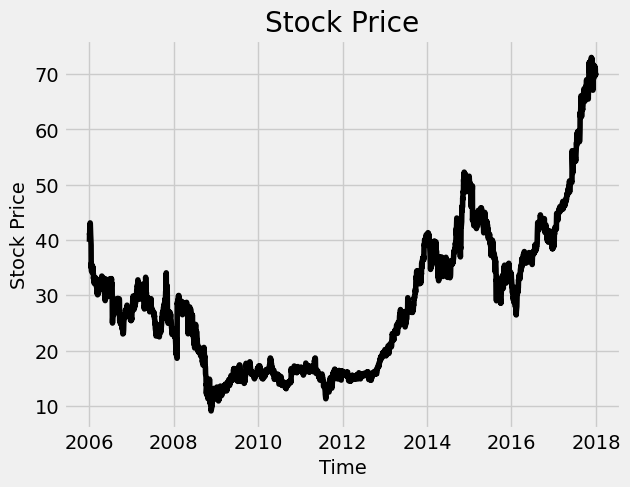

In [7]:
#Checking for stock's market company with line plot
#Write your code below
plt.plot(dataset['Open'], color='black')
plt.title('Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

In [8]:
# Scaling with minmaxscaller for data train
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [9]:
#checking shape of data train
print(training_set_scaled.shape)

(2768, 1)


In [11]:
# create data structure to fill how many row for input in your model at data train
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    #fill for x_train and y_train here
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
#change it into the array
X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
# Reshaping X_train before modelling
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Modelling

In [ ]:
# Sequential Modelling
model = Sequential()
# First LSTM layer with Dropout regularisation
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Second LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
# Third LSTM layer, fill the code below
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
# Fourth LSTM layer, fill the code below
model.add(LSTM(units=50))
model.add(Dropout(0.2))
# The output layer
model.add(Dense(units=1))
# Compiling
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
# Train fitting for the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
85/85 [==============================] - 92s 199ms/step - loss: 0.0130
Epoch 2/100
85/85 [==============================] - 14s 162ms/step - loss: 0.0042
Epoch 3/100
85/85 [==============================] - 14s 162ms/step - loss: 0.0034
Epoch 4/100
85/85 [==============================] - 14s 161ms/step - loss: 0.0035
Epoch 5/100
85/85 [==============================] - 14s 160ms/step - loss: 0.0030
Epoch 6/100
85/85 [==============================] - 14s 160ms/step - loss: 0.0027
Epoch 7/100
85/85 [==============================] - 14s 160ms/step - loss: 0.0026
Epoch 8/100
85/85 [==============================] - 14s 161ms/step - loss: 0.0022
Epoch 9/100
85/85 [==============================] - 14s 160ms/step - loss: 0.0024
Epoch 10/100
85/85 [==============================] - 14s 162ms/step - loss: 0.0023
Epoch 11/100
85/85 [==============================] - 14s 159ms/step - loss: 0.0021
Epoch 12/100
85/85 [==============================] - 14s 162ms/step - loss: 0.0022
E

In [14]:
# Prepare for data test similar way for data train
dataset_total = pd.concat((dataset['Open'][:a], dataset['Open'][b:]), axis=0)
test = dataset_total[len(dataset_total)-len(test_set)-60:].values
test = test.reshape(-1, 1)
test = sc.transform(test)
#Transform the inputs
X_test = []
for i in range(60, len(test_set)):
    X_test.append(test_set[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [15]:
#checking data test shape
print(X_test.shape)

(191, 60, 1)


### Prediction

In [16]:
# Preparing X_test and predicting the prices of the stock's that you choose
X_test = []
for i in range(60, len(test_set)):
    X_test.append(test_set[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Predicting stocks price
predict_stock_price = model.predict(X_test)
predict_stock_price = sc.inverse_transform(predict_stock_price)

6/6 [==============================] - 153s 258ms/step


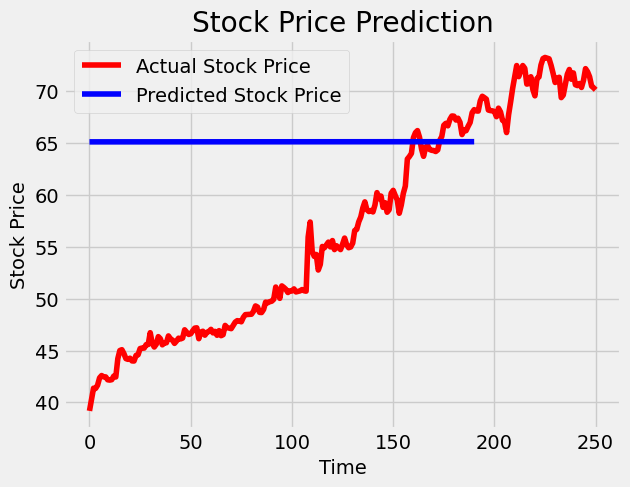

In [17]:
# Visualizing the results for prediction 
visualize = prediction_plot(test_set, predict_stock_price)
visualize

In [19]:
# Evaluating our model with RMSE function above
# Check the length of test_set and predict_stock_price
test_set_length = len(test_set)
print(test_set_length)

predict_stock_price_length = len(predict_stock_price)
print(predict_stock_price_length)
# Adjusting the length of test_set and predict_stock_price
if test_set_length > predict_stock_price_length:
    test_set = test_set[:predict_stock_price_length]
elif test_set_length < predict_stock_price_length:
    predict_stock_price = predict_stock_price[:test_set_length]
    
rmse_eval(test_set, predict_stock_price)

251
191
RMSE: 14.650801421352332


### Write your Insight and advice here :)


**Prediksi Harga Saham**: Setelah melalui proses prediksi, hasilnya menunjukkan bahwa harga saham yang sebenarnya terus mengalami peningkatan seiring waktu, sedangkan harga saham yang diprediksi stabil di sekitar angka 65.

**Evaluasi Model**: Evaluasi model dilakukan dengan menggunakan metode Root Mean Squared Error (RMSE) untuk membandingkan harga saham yang diprediksi dengan harga saham yang sebenarnya. RMSE yang dihasilkan adalah sebesar 14.6508, yang menunjukkan tingkat kesalahan rata-rata dari prediksi harga saham.

*Insight dari analisis dataset ini adalah bahwa model LSTM yang dilatih pada data historis dapat memberikan prediksi yang relatif stabil dalam menghadapi fluktuasi harga saham. Namun, perlu diperhatikan bahwa prediksi harga saham tidak selalu akurat dan terdapat tingkat ketidakpastian dalam pergerakan harga saham di masa depan. Oleh karena itu, hasil prediksi ini sebaiknya digunakan sebagai panduan dan pertimbangan dalam pengambilan keputusan investasi, dengan mempertimbangkan faktor-faktor lain seperti analisis fundamental dan sentimen pasar.*